In [1]:
import pandas as pd
from PIL import Image
import os

# Load data in memory

In [2]:
# Load Excel file
df = pd.read_excel('mapping.xlsx')

In [3]:
df.head()

,ID,Brand,Image name,Description
0,1,Gucci,gucci1.jpg,Inspired by the summer spirit and beach clubs ...
1,2,Gucci,gucci2.jpg,Inspired by the summer spirit and beach clubs ...
2,3,Gucci,gucci3.jpg,Inspired by the summer spirit and beach clubs ...
3,4,Gucci,gucci4.jpg,Inspired by the summer spirit and beach clubs ...


In [4]:
# Define the path to the images folder
img_folder = 'Img'

# Function to load an image given the image name
def load_image(img_name):
    img_path = os.path.join(img_folder, img_name)
    return Image.open(img_path)

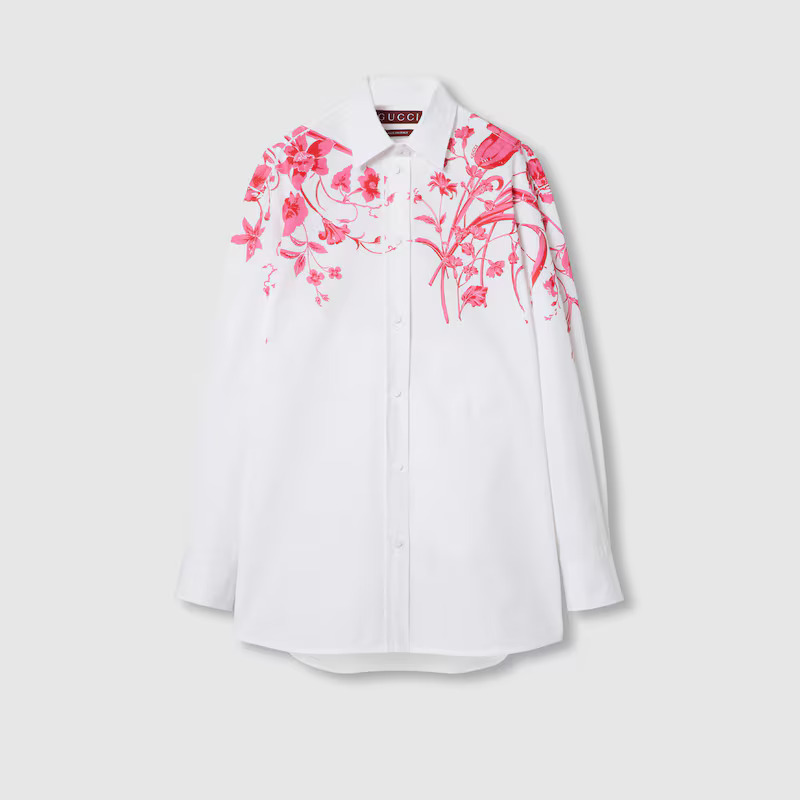

Description: Inspired by the summer spirit and beach clubs of the Italian coast, this item is part of the Gucci Lido line. This shirt is enlivened by a delicate Gucci flower and insect print. The detachable contrasting pointed collar offers style versatility.

White cotton poplin
Buttons covered with the same fabric
Gucci flower and insect print
Detachable pointed collar with ribbon closure at the front
Sleeves
Button closure
Length: 83cm, based on a size 40 (IT)
Made in Italy
The product shown in the image is a size 40 (IT)
Fabric: 100% Cotton.


In [5]:
# Example: Load the first image and description
first_image_name = df.loc[0, 'Image name']
first_description = df.loc[0, 'Description']

first_image = load_image(first_image_name)
first_image.show()  # This will display the image
print("Description:", first_description)

In [6]:
df.index

RangeIndex(start=0, stop=4, step=1)

In [7]:
for i in df.index:
    first_image_name = df.loc[0, 'Image name']
    first_description = df.loc[0, 'Description']
    df['Img'] = load_image(first_image_name)
    

# Use LangChain + GPT 4.o

In [8]:
import getpass
from apikey import apikey 

In [3]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from langchain.prompts import ChatPromptTemplate, MessagesPlaceholder


from langchain.chains import LLMChain, SequentialChain 
from langchain.memory import ConversationBufferMemory
from langchain.utilities import WikipediaAPIWrapper 

In [10]:
apikey

'sk-proj-OvVavmDwvsvUHryza7P7T3BlbkFJ9K11gPvYgUYrNbDFjUOd'

In [11]:
os.environ['OPENAI_API_KEY'] = 'sk-proj-OvVavmDwvsvUHryza7P7T3BlbkFJ9K11gPvYgUYrNbDFjUOd'

In [12]:
# LLM
model = ChatOpenAI(model="gpt-4o", temperature=0.7)

In [68]:
prompt_text = """

    {img} \n
    Description: {txt} \n

    There are 3 images of the same clothing peace, use them to fill the following format to list attributes of the clothing peace in image, separate them with comma:  
    *Type:  
    *Fit:   
    *Sleeve type : (only if this is a shirt)    
    *collar type:  (only if this is a shirt) 
    *Patterns:   (only if applicable)
    *Pattern location:   (only if applicable)
    *Material:   
    *Formality:   
    *Seasson:   
    *Colors:  (percentage of each color in the clothing peace) 
    *Silhouette:  
    *Inspiration: 
    *Cut: 
    *Fabric:
    *Texture:  
    *Style:  


    Use information from the image and the description.
    IGNORE BACKGROUND
    ONLY ANSWER THE FORMAT  
    DONT USE THE BRAND NAME IN ANY DESCRIPTION  
    IN EACH DESCRIPTION - CHARACTERISTIC SHOULD BE ITS OWN DESCRIPTION  
    DONT USE MULTICOLOR OR Multicolor, NAME THE SPECIFIC COLORS  
    COLORS SHOULD INCLUDE PRINT AND CLOTHE COLORS WITHOUT ANY DESCRIPTION OF THE PRINT ONLY MAIN COLORS
   
"""

In [69]:
# Prompt template
prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a fashion specialist and analyst."),
        ("user", prompt_text),
    ]
)

In [70]:
chain = prompt | model

In [71]:
response = chain.invoke({"img": first_image_name, "txt": first_description})
print(response.content)

*Type: [Shirt]
*Fit: [Regular]
*Sleeve type: [Long sleeves]
*Collar type: [Detachable pointed collar]
*Patterns: [Gucci flower and insect print]
*Material: [Cotton poplin]
*Formality: [Casual]
*Season: [Summer]
*Colors: [White, Multicolor print]
*Silhouette: [Straight]
